The following dataset is from a GEANT based simulation of electron-proton inelastic scattering measured by a particle detector system. We will be using Decision Trees and Random Forests to classify particles based on feature data measured by the detector.

The ultamite goal is to take data measured by the detector (and new features that can be extrapolated from the given data) and train the algorithms on that data in order to make future predictions. The features we will have are p (momentum) in units of GeV/c, Theta (angle) in units of radians, Beta (angle) in units of radians, nphe (number of photo electrons), ein (inner energy) in units of GeV, and eout (outer energy) in units of GeV.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("pid-5M.csv")
df.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


We can add another column with each particle's de Broglie wavelength. By taking hc/pc, we can get the de Broglie wavelength in nm. To make the numbers a little more like the numbers we have, we can then multiply each de Broglie wavelength by 1,000,000 in order for the lengths to be in femptometers (fm).

Note that p (momentum) already is in units of GeV/c. So multiplying p by c just gives us a number in units of GeV.

In [3]:
df["de_Broglie"] = ""
df.head()

,id,p,theta,beta,nphe,ein,eout,de_Broglie
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000,
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000,
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000,
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000,
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256,


In [4]:
h_c = .00000123984 #hc planck's constant, units GeV*nm

def lamda(p):
    return h_c/p

In [5]:
wavelengths = []
for i in range(df["id"].count()):
    x = df["p"][i]
    y = lamda(x)
    wavelengths.append(y)

In [6]:
new_wavelengths = []  
for i in range(len(wavelengths)):   #Putting wavelengths in units of fm
    x = wavelengths[i]
    new_wavelengths.append(x*1000000)

In [7]:
df["de_Broglie"] = new_wavelengths
df.head()

,id,p,theta,beta,nphe,ein,eout,de_Broglie
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000,1.589455
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000,4.751637
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000,1.603887
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000,2.599262
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256,0.583924


In [8]:
df.describe()

,id,p,theta,beta,nphe,ein,eout,de_Broglie
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02,1.514775e+00
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01,1.088758e+00
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.345095e-01
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.515776e-01
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02,1.162913e+00
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02,1.862318e+00
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00,5.900712e+00


ID's: Positron (-11), Pion (211), Kaon (321), Proton (2212)

Let's look at some distributions and a correlation matrix.

Text(0.5,1,'Momentum Distribution for all Particles')

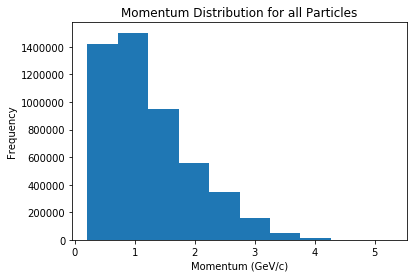

In [9]:
#Momentum Histogram
momentum = np.array(df["p"])
plt.hist(momentum, range = (momentum.min(), momentum.max()))
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("Frequency")
plt.title("Momentum Distribution for all Particles")

Text(0.5,1,'Theta Distribution for all Particles')

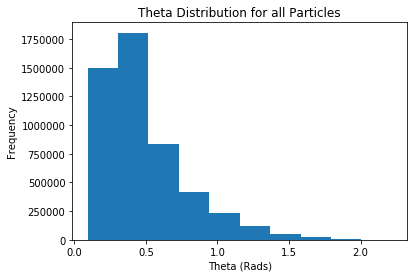

In [10]:
#Theta Histogram
theta = np.array(df["theta"])
plt.hist(theta, range = (theta.min(), theta.max()))
plt.xlabel("Theta (Rads)")
plt.ylabel("Frequency")
plt.title("Theta Distribution for all Particles")

Text(0.5,1,'Beta Distribution for all Particles')

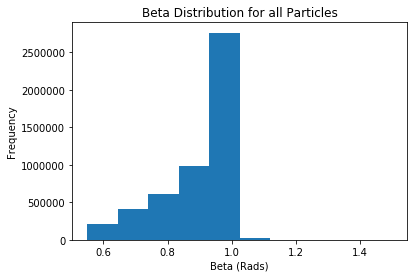

In [11]:
#Beta Histogram
beta = np.array(df["beta"])
plt.hist(beta, range = (beta.min(), beta.max()))
plt.xlabel("Beta (Rads)")
plt.ylabel("Frequency")
plt.title("Beta Distribution for all Particles")

Text(0.5,1,'de Broglie Wavelength Distribution for all Particles')

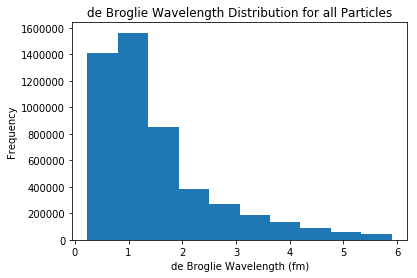

In [12]:
#de Broglie Histogram
de_broglie = np.array(df["de_Broglie"])
plt.hist(de_broglie, range = (de_broglie.min(), de_broglie.max()))
plt.xlabel("de Broglie Wavelength (fm)")
plt.ylabel("Frequency")
plt.title("de Broglie Wavelength Distribution for all Particles")

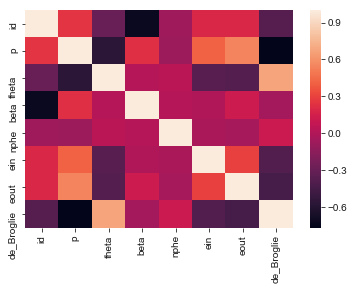

In [13]:
#Heatmap of features

import seaborn as sns
sns.heatmap(df[["id", "p", "theta", "beta", "nphe", "ein", "eout", "de_Broglie"]].corr())
sns.set(style = 'dark')

Let's start training and testing with the decision trees and random forests using the default settings.

In [14]:
X = np.array(df.drop("id", axis = 1))
y = np.array(df["id"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size = 0.2)

In [15]:
dct = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [16]:
dct.fit(X_train, y_train) #Fitting with decision tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
dctpredict = dct.predict(X_test)

In [18]:
accuracy_score(y_true, dctpredict)

0.958451

In [19]:
print(classification_report(y_true, dctpredict))

              precision    recall  f1-score   support

         -11       0.62      0.64      0.63      2907
         211       0.97      0.97      0.97    561233
         321       0.67      0.68      0.67     46702
        2212       0.98      0.98      0.98    389158

   micro avg       0.96      0.96      0.96   1000000
   macro avg       0.81      0.82      0.81   1000000
weighted avg       0.96      0.96      0.96   1000000



In [20]:
rfc.fit(X_train, y_train) #Fitting with random forest

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfcpredict = rfc.predict(X_test)

In [22]:
accuracy_score(y_true, rfcpredict)

0.969464

In [23]:
print(classification_report(y_true, rfcpredict))

              precision    recall  f1-score   support

         -11       0.80      0.65      0.72      2907
         211       0.97      0.98      0.98    561233
         321       0.79      0.70      0.74     46702
        2212       0.98      0.99      0.99    389158

   micro avg       0.97      0.97      0.97   1000000
   macro avg       0.89      0.83      0.86   1000000
weighted avg       0.97      0.97      0.97   1000000



Precision went up quite a bit for both the positron (-11) and the kaon (321), but recall is still too low. We can see that those particles are underrepresented. Since we already have millions of data points, we will undersample the pion (211) and proton (2212) data points to make all particles somewhat equally represented.

In [24]:
positron = []
pion = []
kaon = []
proton = []

for i in range(df["id"].count()):
    if df["id"][i] == -11:
        positron.append(df.loc[i])
    if df["id"][i] == 211:
        pion.append(df.loc[i])
    if df["id"][i] == 321:
        kaon.append(df.loc[i])
    if df["id"][i] == 2212:
        proton.append(df.loc[i])

In [25]:
print(len(positron))
print(len(pion))
print(len(kaon))
print(len(proton))

14847
2806833
232471
1945849


Let's make the pion, kaon, and proton sizes equal to the positron size, 14847.

In [31]:
from random import shuffle

shuffle(pion)
shuffle(kaon)
shuffle(proton)

In [37]:
new_pion = []
new_kaon = []
new_proton = []

for i in range(len(positron)):
    new_pion.append(pion[i])
    new_kaon.append(kaon[i])
    new_proton.append(proton[i])

In [38]:
print(len(new_pion))
print(len(new_kaon))
print(len(new_proton))

14847
14847
14847


In [39]:
new_data = new_pion + new_kaon + new_proton + positron
print(len(new_data))
    

59388


In [40]:
shuffle(new_data)

In [52]:
newdf = pd.DataFrame(new_data, columns = df.columns)
newdf.head()

,id,p,theta,beta,nphe,ein,eout,de_Broglie
3427395,211.0,0.330663,0.653412,0.919855,0.0,0.000000,0.000000,3.749558
1606160,-11.0,0.324559,0.350690,1.001580,0.0,0.000000,0.000000,3.820076
3363796,-11.0,0.295109,0.708349,0.994779,0.0,0.000000,0.000000,4.201295
3555869,2212.0,3.264360,0.174592,0.948181,0.0,0.238315,0.230121,0.379811
2671708,321.0,3.207140,0.358823,0.972153,0.0,0.108309,0.540169,0.386587


In [53]:
newdf = newdf.reset_index()
newdf.head()

,index,id,p,theta,beta,nphe,ein,eout,de_Broglie
0,3427395,211.0,0.330663,0.653412,0.919855,0.0,0.000000,0.000000,3.749558
1,1606160,-11.0,0.324559,0.350690,1.001580,0.0,0.000000,0.000000,3.820076
2,3363796,-11.0,0.295109,0.708349,0.994779,0.0,0.000000,0.000000,4.201295
3,3555869,2212.0,3.264360,0.174592,0.948181,0.0,0.238315,0.230121,0.379811
4,2671708,321.0,3.207140,0.358823,0.972153,0.0,0.108309,0.540169,0.386587


In [54]:
newdf = newdf.drop("index", axis = 1)
newdf.head()

,id,p,theta,beta,nphe,ein,eout,de_Broglie
0,211.0,0.330663,0.653412,0.919855,0.0,0.000000,0.000000,3.749558
1,-11.0,0.324559,0.350690,1.001580,0.0,0.000000,0.000000,3.820076
2,-11.0,0.295109,0.708349,0.994779,0.0,0.000000,0.000000,4.201295
3,2212.0,3.264360,0.174592,0.948181,0.0,0.238315,0.230121,0.379811
4,321.0,3.207140,0.358823,0.972153,0.0,0.108309,0.540169,0.386587


In [55]:
newdf.shape

(59388, 8)

In [56]:
newX = np.array(newdf.drop("id", axis = 1))
newy = np.array(newdf["id"])

newX_train, newX_test, newy_train, newy_true = train_test_split(newX, newy, test_size = 0.2)

In [57]:
dct.fit(newX_train, newy_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
dctpredict1 = dct.predict(newX_test) #fitting decision tree with balanced sets

In [59]:
accuracy_score(newy_true, dctpredict1)

0.9176629062131672

In [60]:
print(classification_report(newy_true, dctpredict1))

              precision    recall  f1-score   support

       -11.0       0.94      0.94      0.94      2940
       211.0       0.87      0.86      0.87      2950
       321.0       0.89      0.90      0.89      2905
      2212.0       0.97      0.97      0.97      3083

   micro avg       0.92      0.92      0.92     11878
   macro avg       0.92      0.92      0.92     11878
weighted avg       0.92      0.92      0.92     11878



Total accuracy is down, but precision and recall are much more balanced. The numbers look much better overall.

In [61]:
rfc.fit(newX_train, newy_train) #fitting random forest with balanced sets

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rfcpredict1 = rfc.predict(newX_test)

In [63]:
accuracy_score(newy_true, rfcpredict1)

0.9399730594376158

In [64]:
print(classification_report(newy_true, rfcpredict1))

              precision    recall  f1-score   support

       -11.0       0.96      0.96      0.96      2940
       211.0       0.91      0.89      0.90      2950
       321.0       0.91      0.93      0.92      2905
      2212.0       0.98      0.98      0.98      3083

   micro avg       0.94      0.94      0.94     11878
   macro avg       0.94      0.94      0.94     11878
weighted avg       0.94      0.94      0.94     11878



Overall numbers look even better for the random forest. The last thing we will try is increasing the number of samples for a node and as well as for a node split.

In [65]:
rfc1 = RandomForestClassifier(min_samples_leaf = 5, min_samples_split = 10)
dct1 = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 10)

In [66]:
dct1.fit(newX_train, newy_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
dctpredict2 = dct1.predict(newX_test)

In [68]:
accuracy_score(newy_true, dctpredict2)

0.9257450749284392

In [69]:
print(classification_report(newy_true, dctpredict2))

              precision    recall  f1-score   support

       -11.0       0.95      0.95      0.95      2940
       211.0       0.88      0.88      0.88      2950
       321.0       0.90      0.90      0.90      2905
      2212.0       0.97      0.97      0.97      3083

   micro avg       0.93      0.93      0.93     11878
   macro avg       0.93      0.93      0.93     11878
weighted avg       0.93      0.93      0.93     11878



In [70]:
rfc1.fit(newX_train, newy_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
rfcpredict2 = rfc1.predict(newX_test)

In [72]:
accuracy_score(newy_true, rfcpredict2)

0.9431722512207442

In [73]:
print(classification_report(newy_true, rfcpredict2))

              precision    recall  f1-score   support

       -11.0       0.97      0.95      0.96      2940
       211.0       0.92      0.89      0.91      2950
       321.0       0.91      0.94      0.92      2905
      2212.0       0.97      0.98      0.98      3083

   micro avg       0.94      0.94      0.94     11878
   macro avg       0.94      0.94      0.94     11878
weighted avg       0.94      0.94      0.94     11878



We had better overall accuracy with unbalanced sets, but the precision and recall for the positron (-11) and the kaon (321) were not good enough. When we undersampled the data, the overall accuracy was lower, but precision and recall for all particles was over .90 (with the exception of the pion (211) which had .89 for recall).